<a href="https://colab.research.google.com/github/HasithaGallella/EN3160-Image-Processing-and-Machine-Vision/blob/main/Assignments/EN3160_210174X_A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EN3160 Assignment 03:** Neural Networks

- Name: M.M.H.H.B Gallella
- Index No.: 210174X
- Submission Date: 12th November 2024
- GitHub: https://github.com/HasithaGallella
- Assignment Codes on: Google Colab

# Check CUDA setup

In [ ]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce RTX 2060


In [ ]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Create a LeNet-5 network for MNIST using Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# LeNet-5 Model Definition
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Model, Loss, and Optimizer
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

# Test the Model
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f'Test Accuracy: {test_accuracy:.2f}%')

test()


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 56.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.94MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 13.7MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.58MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/10], Loss: 0.3863, Training Accuracy: 87.82%
Epoch [2/10], Loss: 0.0669, Training Accuracy: 97.96%
Epoch [3/10], Loss: 0.0463, Training Accuracy: 98.58%
Epoch [4/10], Loss: 0.0360, Training Accuracy: 98.89%
Epoch [5/10], Loss: 0.0299, Training Accuracy: 99.05%
Epoch [6/10], Loss: 0.0252, Training Accuracy: 99.19%
Epoch [7/10], Loss: 0.0206, Training Accuracy: 99.33%
Epoch [8/10], Loss: 0.0187, Training Accuracy: 99.38%
Epoch [9/10], Loss: 0.0152, Training Accuracy: 99.49%
Epoch [10/10], Loss: 0.0132, Training Accuracy: 99.58%
Test Accuracy: 98.98%


# Dense layer network with manually computed forward path and backpropagations for CIFAR10 dataset

100%|██████████| 170M/170M [00:02<00:00, 76.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/10], Loss: 2.1580, Training Accuracy: 17.10%
Epoch [2/10], Loss: 1.9015, Training Accuracy: 31.00%
Epoch [3/10], Loss: 1.8062, Training Accuracy: 35.70%
Epoch [4/10], Loss: 1.7485, Training Accuracy: 38.22%
Epoch [5/10], Loss: 1.7104, Training Accuracy: 39.89%
Epoch [6/10], Loss: 1.6826, Training Accuracy: 40.97%
Epoch [7/10], Loss: 1.6602, Training Accuracy: 42.06%
Epoch [8/10], Loss: 1.6402, Training Accuracy: 42.94%
Epoch [9/10], Loss: 1.6239, Training Accuracy: 43.70%
Epoch [10/10], Loss: 1.6096, Training Accuracy: 44.05%


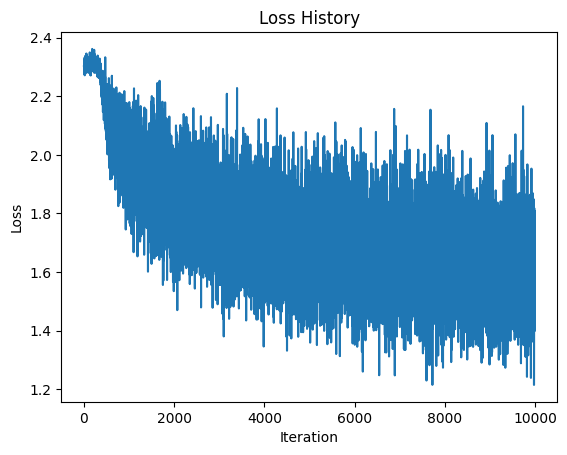

Training accuracy: 44.68%
Test accuracy: 43.52%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR10 image size)
H = 100  # Number of nodes in the hidden layer
K = 10  # Output size (number of classes in CIFAR10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std
b2 = torch.zeros(K)

# Hyperparameters
iterations = 10
lr = 1e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# Cross-Entropy Loss Function
def cross_entropy_loss(y_pred, y_true):
    return -torch.sum(y_true * torch.log(y_pred + 1e-9)) / y_true.shape[0]

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        # Forward pass - Hidden Layer
        hidden_output = sigmoid(x_train.mm(w1) + b1)
        # Forward pass - Output Layer
        y_pred = torch.softmax(hidden_output.mm(w2) + b2, dim=1)

        # Loss calculation (Cross-Entropy Loss with regularization)
        loss = cross_entropy_loss(y_pred, y_train_onehot) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = y_pred - y_train_onehot
        dw2 = hidden_output.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)
        dhidden = dy_pred.mm(w2.t()) * hidden_output * (1 - hidden_output)
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

        # Calculate accuracy
        _, predicted = torch.max(y_pred, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{t + 1}/{iterations}], Loss: {running_loss / len(trainloader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        hidden_output = sigmoid(x_train.mm(w1) + b1)
        y_train_pred = torch.softmax(hidden_output.mm(w2) + b2, dim=1)
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        hidden_output = sigmoid(x_test.mm(w1) + b1)
        y_test_pred = torch.softmax(hidden_output.mm(w2) + b2, dim=1)
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


# Transfer learning a pre-trained ResNet18 network trained on ImageNet1K to classify hymenoptera dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Data Preparation
# Download and extract the dataset in Google Colab
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
data_dir = "./hymenoptera_data"

if not os.path.exists(data_dir):
    urllib.request.urlretrieve(url, "hymenoptera_data.zip")
    with zipfile.ZipFile("hymenoptera_data.zip", 'r') as zip_ref:
        zip_ref.extractall(".")

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root=f'{data_dir}/train', transform=transform)
test_dataset = datasets.ImageFolder(root=f'{data_dir}/val', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# 2. Load Pre-trained ResNet18
resnet18 = models.resnet18(pretrained=True)

# (a) Fine-Tuning
# Modify the final layer for classification of 2 classes (ants and bees)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)
resnet18 = resnet18.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.001, momentum=0.9)

# Training the Model (Fine-Tuning)
num_epochs = 10
resnet18.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

# Testing the Model (Fine-Tuning)
resnet18.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Fine-Tuning Test Accuracy: {test_accuracy:.2f}%')

# (b) Feature Extraction
resnet18 = models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the final layer for classification of 2 classes
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)
resnet18 = resnet18.to(device)

# Only train the final layer
optimizer = optim.SGD(resnet18.fc.parameters(), lr=0.001, momentum=0.9)

# Training the Model (Feature Extraction)
resnet18.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}, Training Accuracy: {train_accuracy:.2f}%')

# Testing the Model (Feature Extraction)
resnet18.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Feature Extraction Test Accuracy: {test_accuracy:.2f}%')


Epoch [1/10], Loss: 0.5196, Training Accuracy: 70.90%
Epoch [2/10], Loss: 0.1708, Training Accuracy: 96.72%
Epoch [3/10], Loss: 0.1734, Training Accuracy: 96.31%
Epoch [4/10], Loss: 0.1354, Training Accuracy: 95.08%
Epoch [5/10], Loss: 0.0665, Training Accuracy: 98.36%
Epoch [6/10], Loss: 0.0634, Training Accuracy: 97.95%
Epoch [7/10], Loss: 0.0158, Training Accuracy: 100.00%
Epoch [8/10], Loss: 0.0423, Training Accuracy: 98.77%
Epoch [9/10], Loss: 0.0252, Training Accuracy: 99.59%
Epoch [10/10], Loss: 0.0178, Training Accuracy: 100.00%
Fine-Tuning Test Accuracy: 94.12%
Epoch [1/10], Loss: 0.6411, Training Accuracy: 63.52%
Epoch [2/10], Loss: 0.3607, Training Accuracy: 86.48%
Epoch [3/10], Loss: 0.2549, Training Accuracy: 90.57%
Epoch [4/10], Loss: 0.3157, Training Accuracy: 83.20%
Epoch [5/10], Loss: 0.2718, Training Accuracy: 91.80%
Epoch [6/10], Loss: 0.1348, Training Accuracy: 96.72%
Epoch [7/10], Loss: 0.1845, Training Accuracy: 94.26%
Epoch [8/10], Loss: 0.1460, Training Accuracy